<a href="https://colab.research.google.com/github/Danial-sb/PageRank/blob/main/Pagerank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import networkx as nx
import numpy as np

In [3]:
def create_graph(nodes, prob):
  graph = nx.gnp_random_graph(nodes, prob, directed=True)
  nx.draw(graph, with_labels = True, font_color= 'red', font_size = 10, node_color = 'yellow')

  return graph

In [4]:
def initialize(G):
  points = [100 for i in range(G.number_of_nodes())]
  return points

In [5]:
def distribute(G, prev_points):
  new_points = [0 for i in range(G.number_of_nodes())]
  for i in G.nodes:
    out = G.out_edges(i)
    if len(out) == 0:
      new_points[i] += prev_points[i]
    else:
      share = prev_points[i] / len(out)
      for each in out:
        new_points[each[1]] += share
  return G, new_points  

In [6]:
def converge(G, points, iterations):
  prev_points = points
  for i in range(iterations):
    G, new_points = distribute(G, prev_points)
    prev_points = new_points
  return G, new_points   

In [7]:
def get_node_ranks(points):
  array_of_points = np.array(points)
  pagerank = np.argsort(-array_of_points)
  return pagerank

In [8]:
def built_in_pagerank(G):
  pagerank = nx.pagerank(G)
  rank_of_nodes = sorted(pagerank.items(), key = lambda x:x[1], reverse = True)
  return rank_of_nodes

([133.8900578109139,
  106.76469010910633,
  106.18190817319467,
  123.15386705283323,
  136.58411934979807,
  91.04262612140268,
  74.50088394968368,
  128.84475179301316,
  68.03538905643802,
  102.77458342414126,
  78.7007753946449,
  47.58252348457747,
  120.23201803018041,
  97.71015779378213,
  84.00164845629044],
 array([ 4,  0,  7,  3, 12,  1,  2,  9, 13,  5, 14, 10,  6,  8, 11]),
 [(4, 0.08776725309905761),
  (0, 0.08645329851673658),
  (7, 0.08278331527266883),
  (3, 0.07988073992821848),
  (12, 0.07843181235745095),
  (1, 0.07006862923900564),
  (2, 0.0690768990204433),
  (9, 0.06801955038453462),
  (13, 0.06532680685710557),
  (5, 0.06110587902092175),
  (14, 0.057425840697304546),
  (10, 0.05515004484336686),
  (6, 0.052272528308388036),
  (8, 0.04899168993320284),
  (11, 0.03724571252159429)])

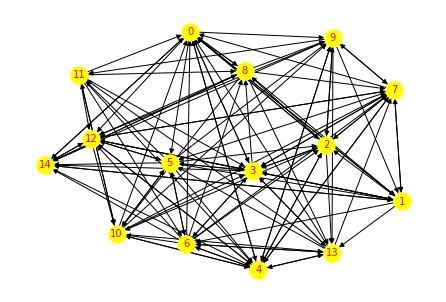

In [21]:
def main():

  graph = create_graph(15, 0.6)
  points = initialize(graph)
  G, points = converge(graph, points, 10)
  pagerank = get_node_ranks(points)
  builtin_pagerank = built_in_pagerank(graph)
  return points, pagerank, builtin_pagerank


main()